In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy
import numpy as np
import seaborn as sns
from uncertainties import ufloat

In [2]:
from eta_sp import ETA_SP, YIELD_SB
eta_sp_func = ETA_SP()
yield_sb_func = YIELD_SB()

## Now we run the calculation on the full list of scenarios

In [3]:
input_df = pd.read_csv("data/eta_sp_input.csv")
input_df.sample(3)

product electron_carrier       pathway  eta_pv_low  eta_pv_high  eta_ec_low  \
8    food          Formate  Serine cycle       0.041        0.056         0.3   
9    food         Methanol  Calvin cycle       0.041        0.056         0.5   
4    feed         Methanol  Serine cycle       0.041        0.056         0.5   

   eta_ec_high  eta_bio_low  eta_bio_high  eta_prod_low  eta_prod_high  \
8          0.5         0.39          0.53          0.46           0.63   
9          0.6         0.19          0.22          0.46           0.63   
4          0.6         0.33          0.36          1.00           1.00   

   theta_dac_low  theta_dac_high  theta_bio_low  theta_bio_high  \
8           0.52            0.78           0.38            0.78   
9           0.52            0.78           0.38            0.78   
4           0.52            0.78           0.38            0.78   

   theta_nut_low  theta_nut_high  theta_ppr_low  theta_ppr_high  
8           0.24            0.33           0.52            1.05  
9           0.24            0.33           0.52            1.05  
4           0.24            0.33           0.42            0.46

In [4]:
eta_star_value = []
eta_star_error = []
eta_sp_value = []
eta_sp_error = []

for _, row in input_df.iterrows():
    variables = {}
    for v in eta_sp_func._variables:
        high = row[v+"_high"]
        low = row[v+"_low"]
        variables[v] = ufloat( (high+low)/2.0, (high-low)/2.0 )
    
    eta_star_estimate = eta_sp_func.calc_eta_star(**variables)
    eta_star_value.append(eta_star_estimate.nominal_value)
    eta_star_error.append(eta_star_estimate.std_dev)

    eta_sp_estimate = eta_sp_func.calc_eta_sp(**variables)
    eta_sp_value.append(eta_sp_estimate.nominal_value)
    eta_sp_error.append(eta_sp_estimate.std_dev)

eta_sp_df = input_df.copy()
eta_sp_df["eta_star_value"] = eta_star_value
eta_sp_df["eta_star_error"] = eta_star_error
eta_sp_df["eta_sp_value"] = eta_sp_value
eta_sp_df["eta_sp_error"] = eta_sp_error

eta_sp_df["label"] = eta_sp_df["product"] + " : " + eta_sp_df.electron_carrier + " : " + eta_sp_df.pathway

eta_sp_df.sample(3)

product electron_carrier       pathway  eta_pv_low  eta_pv_high  eta_ec_low  \
4    feed         Methanol  Serine cycle       0.041        0.056        0.50   
2    feed          Formate  Serine cycle       0.041        0.056        0.30   
0    feed         Hydrogen  Calvin cycle       0.041        0.056        0.65   

   eta_ec_high  eta_bio_low  eta_bio_high  eta_prod_low  ...  theta_bio_high  \
4         0.60         0.33          0.36           1.0  ...            0.78   
2         0.50         0.39          0.53           1.0  ...            0.78   
0         0.75         0.33          0.36           1.0  ...            0.78   

   theta_nut_low  theta_nut_high  theta_ppr_low  theta_ppr_high  \
4           0.24            0.33           0.42            0.46   
2           0.24            0.33           0.42            0.46   
0           0.24            0.33           0.42            0.46   

   eta_star_value  eta_star_error  eta_sp_value  eta_sp_error  \
4        0.729415        0.031626      0.006713      0.001171   
2        0.735446        0.061889      0.006563      0.001753   
0        0.679287        0.032689      0.007956      0.001349   

                            label  
4  feed : Methanol : Serine cycle  
2   feed : Formate : Serine cycle  
0  feed : Hydrogen : Calvin cycle  

[3 rows x 24 columns]

In [5]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)

ax.errorbar(eta_sp_df.eta_sp_value, range(eta_sp_df.shape[0]), xerr=eta_sp_df.eta_sp_error, marker='o', ls='', elinewidth=1, capsize=0)
ax.set_yticks(range(eta_sp_df.shape[0]))
ax.set_yticklabels(eta_sp_df.label)
ax.set_xlim(0, 0.01)
ax.set_xlabel("$\eta_{sp}$");

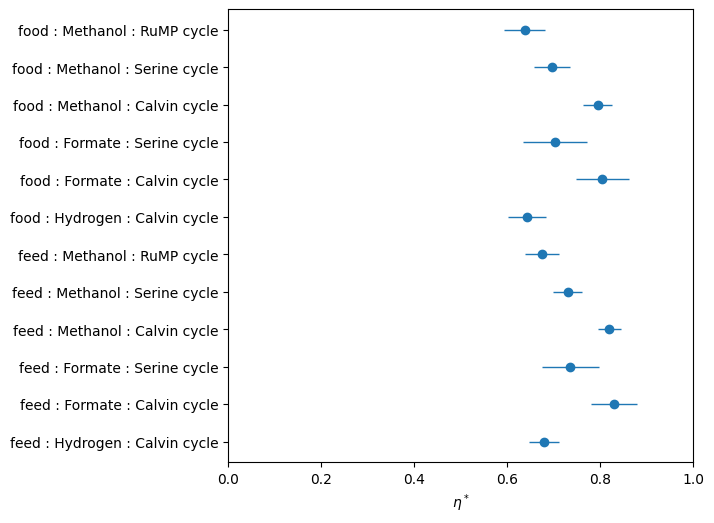

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
ax.errorbar(eta_sp_df.eta_star_value, range(eta_sp_df.shape[0]), xerr=eta_sp_df.eta_star_error, marker='o', ls='', elinewidth=1, capsize=0)
ax.set_yticks(range(eta_sp_df.shape[0]))
ax.set_yticklabels(eta_sp_df.label)
ax.set_xlim(0, 1)
ax.set_xlabel("$\eta^*$");

In [7]:
eta_sp_df["eta_star_low"] = eta_sp_df.eta_star_value - eta_sp_df.eta_star_error
eta_sp_df["eta_star_high"] = eta_sp_df.eta_star_value + eta_sp_df.eta_star_error
eta_sp_df["eta_sp_low"] = eta_sp_df.eta_sp_value - eta_sp_df.eta_sp_error
eta_sp_df["eta_sp_high"] = eta_sp_df.eta_sp_value + eta_sp_df.eta_sp_error
eta_sp_df.to_csv("result/eta_sp_result.csv")

## plotting figure 2 and 3

In [8]:
colors = {
    "Calvin cycle": (0.5, 0.8, 0.9),
    "Serine cycle": (0.2, 0.7, 0.3),
    "RuMP cycle": (0.7, 0.3, 0.9),
    "Sugar beet sucrose SCP": (0.8, 0.8, 0.2),
    "Maize": (0.0, 0.0, 0.0),
    "Sugar beet": (0.0, 0.0, 0.0),
    "Soybean": (0.0, 0.0, 0.0),
}

cal_per_joule = 4.184 # we used 4.184 kj per kcal elsewhere.. i see both exist but lets stick to 4.184
kcal_per_kwh = 3600 / cal_per_joule

alpha = 1.576427
beta = 3.516161e-4 

caloric_yield = lambda eta_sp, irradiance: eta_sp * irradiance * (alpha - beta * irradiance) * kcal_per_kwh

irradiance_range = np.linspace(700, 2700, 50)

def caloric_yield_sb_scp(row, irradiance: float):
    sb_variables = {}
    for v in eta_sp_func._variables:
        sb_variables[v] = ufloat( (row[v + "_low"] + row[v + "_high"])/2.0, (row[v + "_high"] - row[v + "_low"])/2.0 )

    # biomass growth on sucrose
    sb_variables["eta_bio"] = ufloat( (0.49 + 0.60)/2.0, (0.60 - 0.49)/2.0 )

    # the energy required for sugar beet cultivation, normalized to energy in sucrose
    sb_variables["theta_cult"] = ufloat( (0.1310 + 0.1875)/2.0, (0.1875 - 0.1310)/2.0 )

    # the energy required for sucrose extraction normalized to energy in sucrose
    sb_variables["theta_extrc"] = ufloat(0.0748, 0)

    # the yield of sucrose energy in units of kWh/m2/y
    sb_variables["yield_sc"] = ufloat(4.788, 0)

    sb_variables["irradiance"] = ufloat(irradiance, 0)

    return yield_sb_func.calc_y_sb_scp(**sb_variables) * kcal_per_kwh

# Crop weighted production values
production_energy = {"Maize": 2644, "Sugar beet": 4516, "Soybean": 1013} # in kcal/m2/y
production_protein = {"Maize": 71, "Sugar beet": 84, "Soybean": 115} # in g Prot/m2/y

location_df = pd.read_csv("data/location_irradiance.csv", header=0)

In [9]:
ylim_max = 13000
ytick_step = 2000

fig, axs = plt.subplots(2, 3, figsize=(10, 8), dpi=90, sharey=False)

for i, product in enumerate(["feed", "food"]):

    for j, electron_carrier in enumerate(["Hydrogen", "Formate", "Methanol"]):
        ax = axs[i, j]
        group_df = eta_sp_df[(eta_sp_df["product"] == product) & (eta_sp_df["electron_carrier"] == electron_carrier)]
        for row in group_df.itertuples():
            c = colors[row.pathway]
            y_min = caloric_yield(row.eta_sp_value - row.eta_sp_error, irradiance_range)
            y_mean = caloric_yield(row.eta_sp_value, irradiance_range)
            y_max = caloric_yield(row.eta_sp_value + row.eta_sp_error, irradiance_range)
            ax.plot(irradiance_range, y_mean, label=row.pathway, linewidth=4, color=c)
            #ax.plot(irradiance_range, y_min, linewidth=0.2, label=None, color=c)
            #ax.plot(Iirradiance_range, y_max, linewidth=0.2, label=None, color=c)
            #ax.fill_between(irradiance_range, y_min, y_max, label=None, alpha=0.1, color=c)
            
        # calculate the line for SB SCP
        y_sb_value = [caloric_yield_sb_scp(group_df.iloc[0, :], irradiance).nominal_value for irradiance in irradiance_range]
        y_sb_value = np.array(y_sb_value) 
        ax.plot(irradiance_range, y_sb_value, linewidth=3, color=colors["Sugar beet sucrose SCP"], label="Sugar beet sucrose SCP")

        for crop, prod in production_energy.items():
            ax.plot([irradiance_range[0], irradiance_range[-1]], [prod, prod], linewidth=1, linestyle="--", color=colors[crop], label=None)
            if j == 0:
                ax.text(irradiance_range[-1], prod, crop, va="bottom", ha="right", color=colors[crop])


        ax.set_xlim(irradiance_range[0], irradiance_range[-1])
        ax.set_xticks(np.arange(0, 3000, 400), minor=False)
        ax.tick_params(axis="x", direction="in", grid_color=(0.8, 0.8, 0.8), grid_linewidth=0.2)

        ax.set_yticks(np.arange(0, ylim_max, ytick_step), minor=False)
        ax.tick_params(axis="y", direction="in", left="on", labelleft="on", grid_color=(0.7, 0.7, 0.7), grid_linewidth=0.2)
        
        ax.set_ylim(1, ylim_max)
        ax.grid(which="major", axis="both")
        ax.set_xlim(irradiance_range[0], irradiance_range[-1])

        if i == 1:
            ax.set_xlabel("Irradiance [kWh m$^{-2}$ y$^{-1}$]")
        if i == 0:
            ax.set_title(f"({chr(ord('a') + j)}) {electron_carrier.lower()} electron donor")
            ax.set_xticklabels([])
            secax_x = ax.secondary_xaxis("top", functions=(lambda x: x, lambda x: x))
            secax_x.set_xticks(location_df.irradiance)
            secax_x.set_xticklabels(location_df.location, rotation=45, ha="left", rotation_mode="anchor", color=(0.7, 0.7, 0.7))
            secax_x.tick_params(axis="x", direction="in", width=0)
        if j == 0:
            ax.set_ylabel("Caloric yield [kcal m$^{-2}$ y$^{-1}$]")
        else:
            ax.set_yticklabels([])
        if j == 2:
            secax_y = ax.secondary_yaxis('right', functions=(lambda x: x/kcal_per_kwh, lambda x: x*kcal_per_kwh))
            secax_y.set_ylabel('Energy yield [kWh m$^{-2}$ y$^{-1}$]')
            secax_y.tick_params(axis="y", direction="in")
        if i == 1 and j == 2:
            ax.legend(loc="upper left")

        ax.set_ylim(0, ylim_max)

fig.tight_layout()
fig.savefig("result/figure_2.svg")

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), dpi=90, sharey=False)

gr_prot_per_kcal = 1.0 / 3.991
gr_prot_per_kwh = kcal_per_kwh * gr_prot_per_kcal
protein_yield = lambda eta_sp, irradiance: eta_sp * irradiance * (alpha - beta * irradiance) * gr_prot_per_kwh

product = "food"
ylim_max = 2000
ytick_step = 400

for j, electron_carrier in enumerate(["Hydrogen", "Formate", "Methanol"]):
    ax = axs[j]
    group_df = eta_sp_df[(eta_sp_df["product"] == product) & (eta_sp_df["electron_carrier"] == electron_carrier)]
    ax.set_title(electron_carrier)
    for row in group_df.itertuples():
        c = colors[row.pathway]
        y_min = protein_yield(row.eta_sp_value - row.eta_sp_error, irradiance_range)
        y_mean = protein_yield(row.eta_sp_value, irradiance_range)
        y_max = protein_yield(row.eta_sp_value + row.eta_sp_error, irradiance_range)
        ax.plot(irradiance_range, y_mean, label=row.pathway, linewidth=3, color=c)

    # calculate the line for SB SCP
    y_sb_value = [caloric_yield_sb_scp(group_df.iloc[0, :], irradiance).nominal_value for irradiance in irradiance_range]
    y_sb_value = np.array(y_sb_value) 
    ax.plot(irradiance_range, y_sb_value * gr_prot_per_kcal, linewidth=3, color=colors["Sugar beet sucrose SCP"], label="Sugar beet sucrose SCP")

    for crop, prod in production_protein.items():
        if prod < 100:
            continue
        ax.plot([irradiance_range[0], irradiance_range[-1]], [prod, prod], linewidth=1, linestyle="--", color=colors[crop], label=None)
        if j == 0:
            ax.text(irradiance_range[-1], prod, crop, va="bottom", ha="right", color=colors[crop])

    ax.set_xlim(irradiance_range[0], irradiance_range[-1])
    ax.set_xticks(np.arange(0, 3000, 400), minor=False)
    ax.tick_params(axis="x", direction="in", grid_color=(0.8, 0.8, 0.8), grid_linewidth=0.2)

    ax.set_yticks(np.arange(0, ylim_max, ytick_step), minor=False)
    ax.tick_params(axis="y", direction="in", left="on", labelleft="on", grid_color=(0.7, 0.7, 0.7), grid_linewidth=0.2)

    ax.set_ylim(1, ylim_max)
    ax.grid(which="major", axis="both")
    ax.set_xlim(irradiance_range[0], irradiance_range[-1])

    ax.set_xlabel("Irradiance [kWh m$^{-2}$ y$^{-1}$]")
    ax.set_title(f"({chr(ord('a') + j)}) {electron_carrier.lower()} electron donor")
    secax_x = ax.secondary_xaxis("top", functions=(lambda x: x, lambda x: x))
    secax_x.set_xticks(location_df.irradiance)
    secax_x.set_xticklabels(location_df.location, rotation=45, ha="left", rotation_mode="anchor", color=(0.7, 0.7, 0.7))
    secax_x.tick_params(axis="x", direction="in", width=0)

    if j == 0:
        ax.set_ylabel("Protein yield [g m$^{-2}$ y$^{-1}$]")
    else:
        ax.set_yticklabels([])

    if j == 2:
        secax_y = ax.secondary_yaxis('right', functions=(lambda x: x/kcal_per_kwh, lambda x: x*kcal_per_kwh))
        secax_y.set_ylabel('Energy yield [kWh m$^{-2}$ y$^{-1}$]')
        secax_y.tick_params(axis="y", direction="in")
        ax.legend(loc="upper left")

axs[2].legend(loc="upper left")

fig.tight_layout()
fig.savefig("result/figure_3.svg")